## PCA 

In [1]:
# 데이터 읽기


from IPython.display import Image
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

#caltech_dir = "./multi_img_data/imgs_others/train"
caltech_dir = "C:\\Users\\sanda\\Desktop\\dacon\\traing_imgs_MIL1024\\test"
categories = ['True','False']
nb_classes = len(categories)

image_w = 224
image_h = 224

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    image_dir = caltech_dir + "/" + cat
    #files = glob.glob(image_dir+"/*.PNG")
    files = glob.glob(image_dir+"/*.png") # 확장자 주의
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        #img= img.convert('L')   #흑백변환
        img = img.convert("RGB") #컬러변환
        img = img.resize((image_w, image_h))
        #display(img)

        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 3000 == 0:
            print(cat, " : ", f)

print("데이터 입력 완료")

X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 airplanes
#0 1 0 0 이면 buddha 이런식


#X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)
xy = (X_train, X_test, y_train, y_test)
np.save("./wsi_test_image_data.npy", xy)

print("ok", len(y))

True  파일 길이 :  6383
True  :  C:\Users\sanda\Desktop\dacon\traing_imgs_MIL1024\train/True\BC_01_0002_0.png
True  :  C:\Users\sanda\Desktop\dacon\traing_imgs_MIL1024\train/True\BC_01_1754_4.png
True  :  C:\Users\sanda\Desktop\dacon\traing_imgs_MIL1024\train/True\BC_01_3131_6.png
False  파일 길이 :  6053
False  :  C:\Users\sanda\Desktop\dacon\traing_imgs_MIL1024\train/False\BC_01_0001_0.png
False  :  C:\Users\sanda\Desktop\dacon\traing_imgs_MIL1024\train/False\BC_01_2729_4.png
False  :  C:\Users\sanda\Desktop\dacon\traing_imgs_MIL1024\train/False\BC_01_3417_4.png
데이터 입력 완료


C:\Users\sanda\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ok 12436


In [2]:
print(X.shape)
print(X[0].shape)
print(y[0])

(12436, 224, 224, 3)
(224, 224, 3)
[1 0]


In [3]:
# pca 처리
#hair_iamge = np.load('/content/drive/MyDrive/hairloss_image_data.npy', allow_pickle=True)
hair_iamge = X
#print(hair_iamge.shape)
hair_iamge_2d = hair_iamge.reshape(-1, image_w*image_h*3) #  컬러일 경우
#air_iamge_2d = hair_iamge.reshape(-1, image_w*image_h) #  흑백일 경우

In [4]:
hair_iamge_2d.shape

(12436, 150528)

In [5]:
new_y = []
for i in y:
  if i[0] == 1:
    new_y.append(0)
  elif i[1] == 1:
    new_y.append(1)
#   elif i[2] == 1:
#     new_y.append(2)
#   elif i[3] == 1:
#     new_y.append(3)
#   elif i[4] == 1:
#     new_y.append(4)
#   else:
#     new_y.append(5)
new_y = np.array(new_y)
print(new_y)

[0 0 0 ... 1 1 1]


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(hair_iamge_2d)

print(pca.components_.shape)

(50, 150528)


In [7]:
import matplotlib.pyplot as plt

def draw_hairs(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [8]:
#draw_hairs(pca.components_.reshape(-1, image_w, image_h))

In [9]:
#주성분 분석 이전 shape
print(hair_iamge_2d.shape)

#주성분 분석 이후 shape
hairs_pca = pca.transform(hair_iamge_2d)
print(hairs_pca.shape)

(12436, 150528)
(12436, 50)


In [10]:
hairs_inverse = pca.inverse_transform(hairs_pca)
print(hairs_inverse.shape)
hairs_reconstruct = hairs_inverse.reshape(-1, image_w, image_h)

(12436, 150528)


In [11]:
# for start in [0, 100, 200]:
#     draw_hairs(hairs_reconstruct[start:start+100])
#     # print("\n")

0.6796237587240804


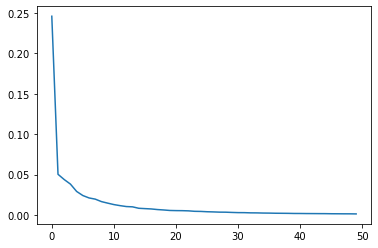

In [12]:
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)

In [13]:
# from sklearn.cluster import KMeans

# km = KMeans(n_clusters=3, random_state=100)
# km.fit(hairs_pca)

# print(np.unique(km.labels_, return_counts=True))

In [14]:
# for label in range(0, 3):
#     draw_hairs(hair_iamge[km.labels_ == label])
#     print("\n",label)

In [15]:
# print(km.labels_)

In [16]:
print(hairs_pca[0])

[-5.10168263e+03  5.39839951e+02  1.48468804e+03 -1.32722747e+02
  4.11779533e+02  1.37071464e+03 -1.90127692e+03 -4.06836350e+02
  1.72068343e+03 -1.55416783e+03  6.82707904e+02 -1.45421748e+02
  9.04429933e+02 -1.57822441e+02  5.94748761e+02 -6.43870188e+01
  1.19343956e+03 -2.27071140e+02 -3.37327830e+02  5.37930193e+01
 -5.75287135e+02  5.90453343e+01 -7.00392669e+02 -1.89418340e+01
  3.87450927e+02 -3.55514955e+02  1.94404459e+02 -5.24456983e+02
 -2.08562957e+01  6.27914606e+02 -4.89411168e+02 -2.01738219e+02
  2.81548511e+02 -4.22411391e+02 -3.03421291e+02 -1.78240753e+02
  1.14837973e+02 -2.90755153e+00  3.29284326e+02 -5.16014107e+02
 -2.90923147e+02 -4.18408587e+02 -4.99620468e+02 -1.99605174e+02
  2.37235141e+02  1.81434362e+02 -4.46697615e+02  4.91349103e+00
 -1.91160718e+02 -5.76920594e+02]


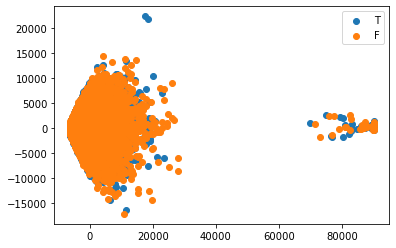

In [17]:
for label in range(0, 2):
    data = hairs_pca[new_y == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['T', 'F'])
plt.show()

### tsne

In [18]:
# from sklearn.manifold import TSNE
# from sklearn.datasets import load_digits

# # MNIST 데이터 불러오기
# data = load_digits()

# # 2차원으로 차원 축소
# n_components = 2

# # t-sne 모델 생성
# model = TSNE(n_components=n_components)

# # 학습한 결과 2차원 공간 값 출력
# result=model.fit_transform(data.data)
# # [
# #     [67.38322, -1.9517338],
# #     [-11.936052, -8.906425],
# #     ...
# #     [-10.278599, 8.832907],
# #     [25.714725, 11.745557],
# # ]

In [19]:
# print(result.shape)

In [20]:
# from sklearn.manifold import TSNE
# from sklearn.datasets import load_digits

# import matplotlib

# import matplotlib.pyplot as plt


# digits = load_digits()


# # t-SNE 모델 생성 및 학습

# tsne = TSNE(random_state=0)

# digits_tsne = tsne.fit_transform(digits.data)


# colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',

#                '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']
# # 시각화

# for i in range(len(digits.data)): # 0부터  digits.data까지 정수

#     plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), # x, y , 그룹

#              color=colors[digits.target[i]], # 색상

#              fontdict={'weight': 'bold', 'size':9}) # font

# plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대

# plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대

# plt.xlabel('t-SNE 특성0') # x축 이름

# plt.ylabel('t-SNE 특성1') # y축 이름

# plt.show() # 그래프 출력

In [21]:
# print(digits.data.shape)

C:\Users\sanda\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sanda\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sanda\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sanda\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


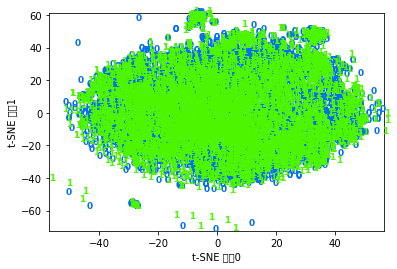

In [22]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

import matplotlib

import matplotlib.pyplot as plt


#digits = load_digits()


# t-SNE 모델 생성 및 학습

tsne = TSNE(random_state=0)

digits_tsne = tsne.fit_transform(hair_iamge_2d)

colors = ['#006ef5', '#4ef500', '#f50031', '#4A2D4E', '#875525',

               '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

# 시각화

for i in range(len(hair_iamge_2d)): # 0부터  digits.data까지 정수

    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(new_y[i]), # x, y , 그룹

             color=colors[new_y[i]], # 색상

             fontdict={'weight': 'bold', 'size':9}) # font

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대

plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대

plt.xlabel('t-SNE 특성0') # x축 이름

plt.ylabel('t-SNE 특성1') # y축 이름

plt.show() # 그래프 출력